<a href="https://colab.research.google.com/github/mcmathiesen/super-potato/blob/main/Assignment5Mathiesen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_iris
iris = load_iris()

In [32]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [33]:
df.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

In [34]:
df['Flower'] = iris.target

In [35]:
df.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  ...  petal width (cm)  Flower
0                  5.1               3.5  ...               0.2       0
1                  4.9               3.0  ...               0.2       0
2                  4.7               3.2  ...               0.2       0
3                  4.6               3.1  ...               0.2       0
4                  5.0               3.6  ...               0.2       0
..                 ...               ...  ...               ...     ...
145                6.7               3.0  ...               2.3       2
146                6.3               2.5  ...               1.9       2
147                6.5               3.0  ...               2.0       2
148                6.2               3.4  ...               2.3       2
149                5.9               3.0  ...               1.8       2

[150 rows x 5 columns]>

In [36]:
km = KMeans(n_clusters=3)
clust = km.fit_predict(df)
clust

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [37]:
df['cluster'] = clust
df.cluster.unique()

array([1, 2, 0], dtype=int32)

In [38]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==3]

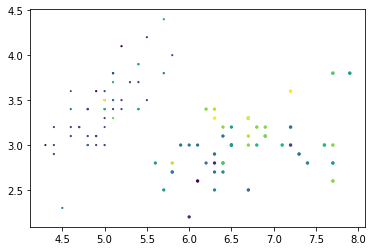

In [39]:
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],df1['petal length (cm)'],df1['petal width (cm)'])
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],df2['petal length (cm)'],df2['petal width (cm)'])
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],df3['petal length (cm)'],df3['petal width (cm)'])

In [40]:
sse = []
k_rng = range(1,10)
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df)
  sse.append(km.inertia_)


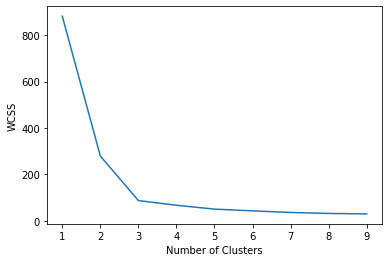

In [41]:
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.plot(k_rng,sse)

In [64]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version =1, return_X_y=True)
#from tensorflow.keras.datasets import mnist
#(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [66]:
x=mnist.data
y=mnist.target
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, x, y, cv=10, scoring = 'accuracy')
print (scores)

AttributeError: ignored

In [69]:
train = mnist
#train.fillna(0, inplace=True)
#print(str(train.shape[0]) + ' rows')
#train.head()

AttributeError: ignored

In [45]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [22]:
X_train.shape

(60000, 28, 28)

In [23]:
Y_train.shape

(60000,)

In [24]:
X_test.shape

(10000, 28, 28)

In [25]:
Y_test.shape

(10000,)

In [51]:
#def fit_random_forest_classifier(X, y, print_output=True):
#    X_train, X_test, y_train, y_test = train_test_split(X, y, 
 #                                                       test_size=0.33, 
  #                                                      random_state=42)

 #   clf = RandomForestClassifier(n_estimators=100, max_depth=None)

  #  clf.fit(X_train, y_train)

   # y_preds = clf.predict(X_test)

    #acc = accuracy_score(y_test, y_preds)
    
    #if print_output == True:
     #   mat = confusion_matrix(y_test, y_preds)
      #  sns.heatmap(mat, annot=True, cmap='bwr', linewidths=.5)

       # print('Input Shape: {}'.format(X_train.shape))
       #print('Accuracy: {:2.2%}\n'.format(acc))
        #print(mat)
    
    #return acc
#fit_random_forest_classifier(X, y);

NameError: ignored

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=2, random_state=11)

In [27]:
pca.fit(mnist.load_data())

ValueError: ignored